# Convolution Neural Network (Tomato leaf disease detection)

### 1. Importing necessary libraries

In [85]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [86]:
tf.__version__

'2.7.0'

### 2. Read the Data and Preprocess the data

In [87]:
pwd

'C:\\Users\\Akshay\\Downloads'

In [88]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
training_set = train_datagen.flow_from_directory(r'C:\Users\Akshay\Downloads\Tomato_data\New Plant Diseases Dataset(Augmented)\train', 
                                                 target_size = (64,64),
                                                 batch_size = 128,
                                                 class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [89]:
label_map = (training_set.class_indices)

print(label_map)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [90]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(r'C:\Users\Akshay\Downloads\Tomato_data\New Plant Diseases Dataset(Augmented)\valid', 
                                                target_size = (64,64),
                                                batch_size = 128,
                                                class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


### 3. Build the CNN

In [91]:
cnn = tf.keras.models.Sequential()

In [92]:
cnn.add(tf.keras.layers.Conv2D(32,(3,3), input_shape=(64,64,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.2))

In [93]:
cnn.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.2))

In [94]:
cnn.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
cnn.add(tf.keras.layers.Dropout(0.4))

In [95]:
cnn.add(tf.keras.layers.Flatten())

In [96]:
cnn.add(tf.keras.layers.Dense(activation='relu', units=128))
cnn.add(tf.keras.layers.Dense(activation='relu', units=64))
cnn.add(tf.keras.layers.Dense(activation='relu', units=64))
cnn.add(tf.keras.layers.Dense(activation='softmax', units=10))

### Training the CNN
### 1. Compile the network and use optimizers and define loss function.
### 2. Fit the network using the compiled object on the train data and evaluate on the test data.

In [97]:
cnn.compile(optimizer='adam',loss = 'categorical_crossentropy', metrics=['accuracy'])

In [98]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 14, 14, 64)       

In [99]:
history = cnn.fit(training_set, validation_data = test_set, epochs = 40)

Epoch 1/40
144/144 [==============================] - 139s 966ms/step - loss: 1.7967 - accuracy: 0.3383 - val_loss: 1.6046 - val_accuracy: 0.4569
Epoch 2/40
144/144 [==============================] - 141s 982ms/step - loss: 0.8863 - accuracy: 0.6907 - val_loss: 1.2248 - val_accuracy: 0.5823
Epoch 3/40
144/144 [==============================] - 142s 989ms/step - loss: 0.6407 - accuracy: 0.7775 - val_loss: 0.7762 - val_accuracy: 0.7365
Epoch 4/40
144/144 [==============================] - 150s 1s/step - loss: 0.5516 - accuracy: 0.8059 - val_loss: 1.7562 - val_accuracy: 0.5485
Epoch 5/40
144/144 [==============================] - 146s 1s/step - loss: 0.4856 - accuracy: 0.8298 - val_loss: 0.7727 - val_accuracy: 0.7468
Epoch 6/40
144/144 [==============================] - 146s 1s/step - loss: 0.4417 - accuracy: 0.8448 - val_loss: 0.5997 - val_accuracy: 0.8011
Epoch 7/40
144/144 [==============================] - 145s 1s/step - loss: 0.3840 - accuracy: 0.8652 - val_loss: 0.8730 - val_accurac

### Model Evaluation

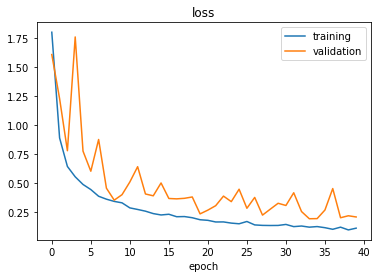

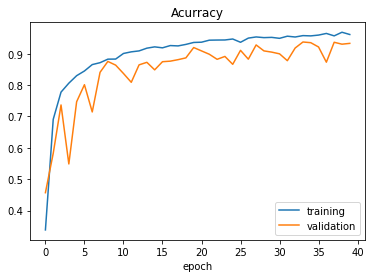

In [100]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
#score = cnn.evaluate(test_set,test_datagen, verbose=0)
#print('Test Score:',score[0])
#print('Test Accuracy:',score[1])

### Make a prediction for single image

In [101]:
cnn.save('leafDisease.h5')

In [146]:
from tensorflow.keras.models import load_model
cnn = load_model('leafDisease.h5')

In [150]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Akshay\Downloads\tomato_msc_vir.JPG',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

In [151]:
print(result[0])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [152]:
#training_set.class_indices

#{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 
# 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 
# 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}

if result[0][0] == 1.:
    prediction = 'Tomato___Bacterial_spot'
    print(prediction)
elif result[0][1] == 1.:
    prediction = 'Tomato___Early_blight'
    print(prediction)
elif result[0][2] == 1.:
    prediction = 'Tomato___Late_blight'
    print(prediction)
elif result[0][3] == 1.:
    prediction = 'Tomato___Leaf_Mold'
    print(prediction)
elif  result[0][4] == 1.:
    prediction = 'Tomato___Septoria_leaf_spot'
    print(prediction)
elif  result[0][5] == 1.:
    prediction = 'Tomato___Spider_mites Two-spotted_spider_mite'
    print(prediction)
elif result[0][6] == 1.:
    prediction = 'Tomato___Target_Spot'
    print(prediction)
elif result[0][7] == 1.:
    prediction = 'Tomato___Tomato_Yellow_Leaf_Curl_Virus'
    print(prediction)
elif result[0][8] == 1.:
    prediction = 'Tomato___Tomato_mosaic_virus'    
    print(prediction)
else:
    prediction = 'Tomato___healthy'
    print(prediction)

Tomato___Tomato_mosaic_virus
